In [86]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import copy
from PIL import Image

In [87]:
blind1_img = cv2.imread('Corneal_scar_d1.PNG')
blind2_img = cv2.imread('Corneal scar_d2.jpg')
blind3_img = cv2.imread('Corneal scar_d3.jpg')
blind4_img = cv2.imread('Corneal scar_d4.jpg')
blind5_img = cv2.imread('Corneal scar_d5.jpg')
blind6_img = cv2.imread('Corneal scar_d6.jpg')
blind7_img = cv2.imread('Corneal scar_d7.jpg')
blind8_img = cv2.imread('Corneal scar_d8.jpg')
blind9_img = cv2.imread('Corneal scar_d9.png')
blind10_img = cv2.imread('Corneal scar_d10.PNG')
blind11_img = cv2.imread('Corneal scar_d11.PNG')


In [758]:
blind_img = blind9_img

In [759]:
rgb_ = cv2.cvtColor(norm_img, cv2.COLOR_BGR2RGB)
gray_ = cv2.cvtColor(norm_img, cv2.COLOR_BGR2GRAY)
rgb_b = cv2.cvtColor(blind_img, cv2.COLOR_BGR2RGB)
gray_b = cv2.cvtColor(blind_img, cv2.COLOR_BGR2GRAY)

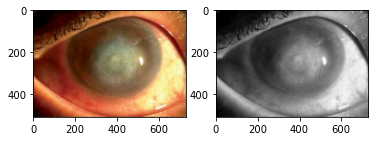

In [760]:
ig, axs = plt.subplots(1, 2)
fig.set_size_inches(16, 9)
axs[0].imshow(rgb_b)
axs[1].imshow(gray_b, cmap='gray', vmin=0, vmax=255)

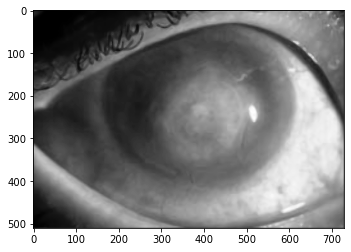

In [761]:
gray_blurred2 = cv2.medianBlur(gray_b, 5)
plt.imshow(gray_blurred2, cmap='gray', vmin=0, vmax=255)

In [762]:
circles_n = cv2.HoughCircles(gray_blurred2, 
                   cv2.HOUGH_GRADIENT, 1, gray_.shape[0]/64,  param1 = 50,
               param2 = 50, minRadius = 65, maxRadius = 350)
circles_n

array([[[465.5, 290.5, 259.1],
        [379.5, 352.5, 341.7],
        [396.5, 354.5, 330.7],
        [388.5, 362.5, 339.5],
        [384.5, 337.5, 328.5],
        [425.5, 300.5, 299.9],
        [406.5, 346.5, 320.8],
        [402.5, 334.5, 310.9],
        [467.5, 254.5, 253.7],
        [414.5, 274.5, 273.4],
        [392.5, 326.5, 326.3],
        [411.5, 327.5, 302.1],
        [381.5, 321.5, 316.4],
        [360.5, 254.5, 253.7],
        [452.5, 303.5, 276.8],
        [434.5, 254.5, 253.7],
        [404.5, 312.5, 312. ],
        [415.5, 252.5, 251.5],
        [371.5, 341.5, 340.6],
        [433.5, 315.5, 298.8],
        [438.5, 287.5, 254.8],
        [468.5, 274.5, 244.9],
        [480.5, 268.5, 232.8],
        [387.5, 310.5, 309.8],
        [381.5, 301.5, 301. ],
        [307.5, 205.5, 306.5],
        [440.5, 271.5, 239.4],
        [413.5, 338.5, 310.9],
        [414.5, 317.5, 316.4],
        [380.5, 231.5, 230.6],
        [406.5, 286.5, 285.6],
        [371.5, 245.5, 244.9],
        

In [763]:
lenlen = len(circles_n[0]) - 1
lenlen

308

In [764]:
#blind1_
max_c = [[[282.5, 253.5, 220.4]]]

In [219]:
#blind2_
max_c = [[[510.5, 300.5, 180.2]]]

In [180]:
#blind3_
max_c = [[[300.5, 253.5,  185.1]]]

In [270]:
#blind4_
max_c = [[[616.5, 350.5, 250.7]]]

In [340]:
#blind5_
max_c = [[[545.5, 390.5, 230.4]]]

In [378]:
#blind6_
max_c = [[[244.5, 153.5, 149.4]]]

In [451]:
#blind7_
max_c = [[[550.5, 389.5, 300.2]]]

In [499]:
#blind8_
max_c = [[[480.5, 298.5, 180.5]]]

In [765]:
#blind9_
max_c = [[[379.5, 250.5, 185.7]]]

In [671]:
#blind10_
max_c = [[[160.5, 80.5, 65.7]]]

In [722]:
#blind11_
max_c = [[[230.5, 170.5, 160.4]]]

In [766]:
def draw_circles(detected_circles, org_img):
    if detected_circles is not None:

        # Convert the circle parameters a, b and r to integers.
        detected_circles = np.uint16(np.around(detected_circles))
        cir_img = org_img.copy()

        for pt in detected_circles[0, :]:
            a, b, r = pt[0], pt[1], pt[2]

            # Draw the circumference of the circle.
            cv2.circle(cir_img, (a, b), r, (0, 255, 0), -1)
            
    return cir_img

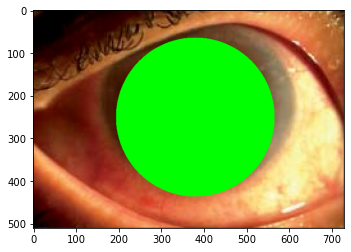

In [767]:
test = draw_circles(max_c, rgb_b)

plt.imshow(test)
plt.show()

In [768]:
cv2.imwrite("saveing.jpg",test)

True

In [769]:
test_cri = cv2.imread('saveing.jpg')

In [770]:
gray_test_cri = cv2.cvtColor(test_cri, cv2.COLOR_BGR2HSV)

In [771]:
binary = cv2.inRange(gray_test_cri, (0, 255,0), (79, 255, 255))

In [772]:
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [773]:
contour = max(contours, key=lambda x: cv2.contourArea(x))

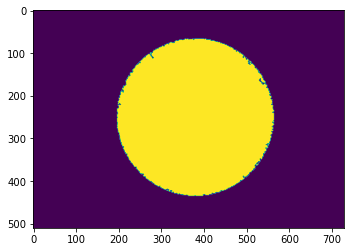

In [774]:
mask = np.zeros_like(binary)
cv2.drawContours(mask, [contour], -1, color=255, thickness=-1)
plt.imshow(mask)
plt.show()

In [775]:
cv2.imwrite("mask_test.jpg",mask)

True

In [776]:
img_mask_test = cv2.imread("mask_test.jpg")

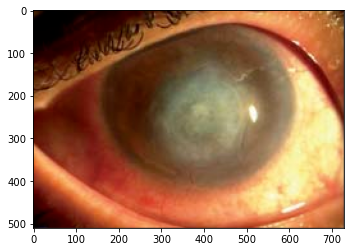

In [777]:
plt.imshow(rgb_b)
plt.show()

In [778]:
crip_f = cv2.bitwise_and(rgb_b, rgb_b, mask=mask)

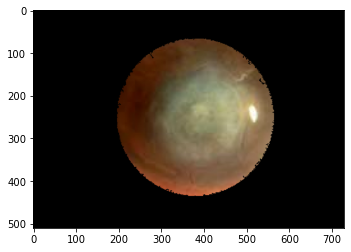

In [779]:
plt.imshow(crip_f)
plt.show()

In [780]:
gray_masked = cv2.cvtColor(crip_f, cv2.COLOR_BGR2GRAY)

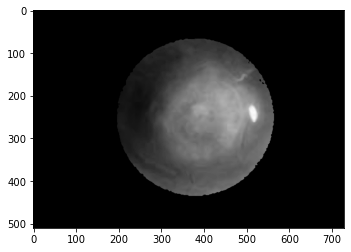

In [781]:
gray_masked_blurred2 = cv2.medianBlur(gray_masked , 5)
plt.imshow(gray_masked_blurred2, cmap='gray', vmin=0, vmax=255)

In [782]:
circles_n = cv2.HoughCircles(gray_masked_blurred2, 
                   cv2.HOUGH_GRADIENT, 1, gray_.shape[0]/64,  param1 = 50,
               param2 = 50, minRadius = 65, maxRadius = 150)
circles_n

In [783]:
threshold_value = 127

In [784]:
gray_mask_img = cv2.cvtColor(crip_f, cv2.COLOR_BGR2GRAY)

In [785]:
threshold_img =gray_mask_img.copy()
threshold_img2 =gray_mask_img.copy()

In [786]:
threshold_img[gray_mask_img < threshold_value] = 0
threshold_img[gray_mask_img >= threshold_value] = 255

In [787]:
threshold_img2[gray_mask_img < threshold_value] = 255
threshold_img2[gray_mask_img >= threshold_value] = 0

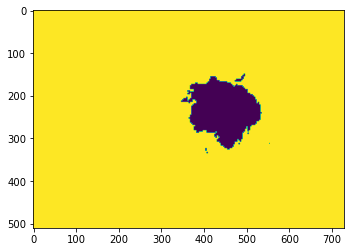

In [788]:
plt.imshow(threshold_img2)
plt.show()

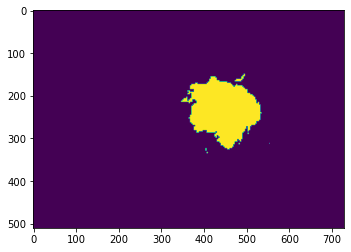

In [789]:
plt.imshow(threshold_img)
plt.show()

In [790]:
crip_ff = cv2.bitwise_and(crip_f, crip_f, mask=threshold_img)

In [791]:
crip_ff2 = cv2.bitwise_and(crip_f, crip_f, mask=threshold_img2)

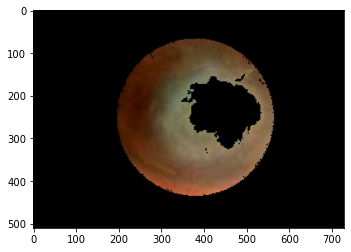

In [792]:
plt.imshow(crip_ff2)
plt.show()

In [750]:
cv2.imwrite("Corneal_scar_d11_bc.jpg",crip_ff2)

True

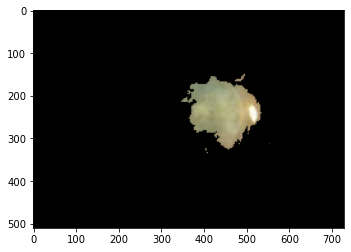

In [793]:
plt.imshow(crip_ff)
plt.show()

In [752]:
cv2.imwrite("Corneal_scar_d11_ac.jpg",crip_ff)

True

In [753]:
img_HSV = cv2.cvtColor(crip_ff, cv2.COLOR_BGR2HSV)
img_HSV = cv2.GaussianBlur(img_HSV, (9, 9), 3)

In [754]:
img_H, img_S, img_V = cv2.split(img_HSV)
_thre, img_flowers = cv2.threshold(img_H, 140, 255, cv2.THRESH_BINARY)
cv2.imwrite('tulips_mask.jpg', img_flowers)

True

In [145]:
for i in range(0, len(contours)):
    if len(contours[i]) > 0:

        # remove small objects
        if cv2.contourArea(contours[i]) < 500:
            continue

        rect = contours[i]
        x, y, w, h = cv2.boundingRect(rect)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 0), 10)

NameError: name 'img' is not defined

In [175]:
cv2.imwrite('cripff_w.jpg', crip_ff)

True

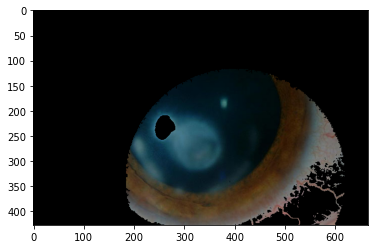

In [176]:
plt.imshow(crip_ff)
plt.show()

In [200]:
img_gray = cv2.cvtColor(crip_f, cv2.COLOR_BGR2GRAY)

In [527]:
img_hsv = cv2.cvtColor(crip_f, cv2.COLOR_BGR2HSV)

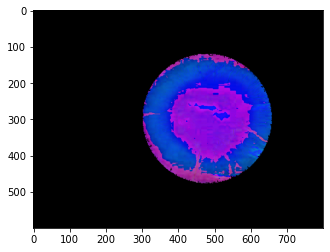

In [528]:
plt.imshow(img_hsv)
plt.show()

In [551]:
binary = cv2.inRange(img_hsv, (0, 0,0), (80, 208, 255))

In [552]:
binaryv2 = cv2.bitwise_not(binary)

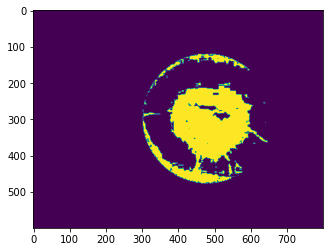

In [562]:
plt.imshow(binaryv2)
plt.show()

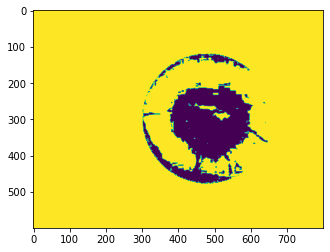

In [563]:
plt.imshow(binary)
plt.show()

In [564]:
crip_ff = cv2.bitwise_and(crip_f, crip_f, mask=binaryv2)

In [565]:
crip_ff2 = cv2.bitwise_and(crip_f, crip_f, mask=binary)

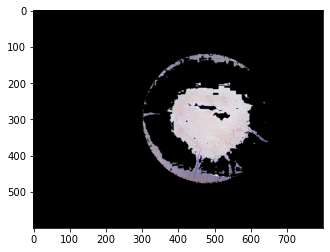

In [566]:
plt.imshow(crip_ff)
plt.show()

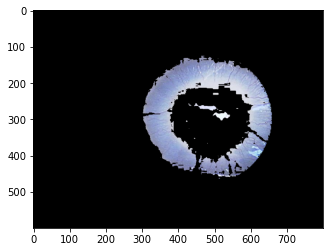

In [567]:
plt.imshow(crip_ff2)
plt.show()

In [568]:
cv2.imwrite("Corneal_scar_d8_bc.jpg",crip_ff2)

True

In [569]:
cv2.imwrite("Corneal_scar_d8_ac.jpg",crip_ff)

True

In [231]:
crip_ff_f = cv2.bitwise_and(crip_ff, crip_ff, mask=binary )

In [258]:
crip_ff_f2 = cv2.bitwise_and(crip_ff, crip_ff, mask=binaryv2 )

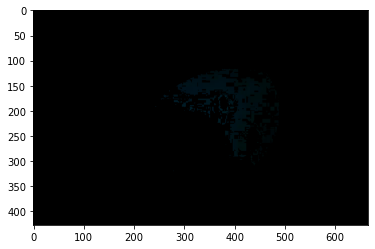

In [232]:
#colour of back ground
plt.imshow(crip_ff_f)
plt.show()

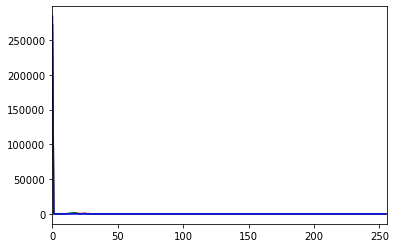

In [260]:
img_1 = cv2.cvtColor(crip_ff_f, cv2.COLOR_BGR2RGB)
colors = ("r", "g", "b")
for i, channel in enumerate(colors):
    histgram = cv2.calcHist([img_1], [i], None, [256], [0, 256])
    plt.plot(histgram, color = channel)
    plt.xlim([0, 256])
plt.show()

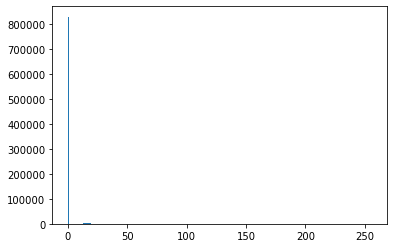

In [262]:
plt.hist(crip_ff_f.ravel(), 256, [0,256])
plt.show()

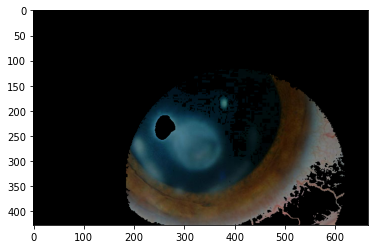

In [259]:
#colour of cornel sc
plt.imshow(crip_ff_f2)
plt.show()

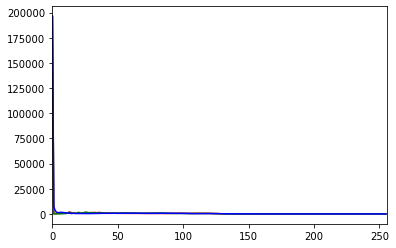

In [261]:
img_1 = cv2.cvtColor(crip_ff_f2, cv2.COLOR_BGR2RGB)
colors = ("r", "g", "b")
for i, channel in enumerate(colors):
    histgram = cv2.calcHist([img_1], [i], None, [256], [0, 256])
    plt.plot(histgram, color = channel)
    plt.xlim([0, 256])
plt.show()

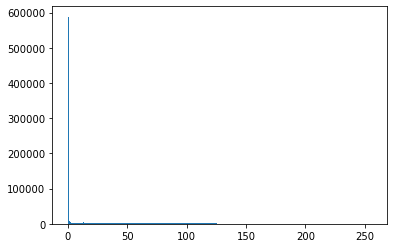

In [263]:
plt.hist(crip_ff_f2.ravel(), 256, [0,256])
plt.show()